# Flights Data Analysis
---
This notebook explores delays in flights and provides insights on:
1. How to calculate delays.
2. Overall delay patterns (monthly and daily).
3. Which airlines have the most delays.
4. Which airlines have the most flights arriving on time.
5. Which airlines have the most flights departing on time.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/soniakhamitkar/Desktop/Babson Grad/Python/Jupyter Files/Flights.csv')

# Ensure no missing values interrupt the analysis
data.fillna(0, inplace=True)

# Add a new column for total delay (arrival + departure)
data['total_delay'] = data['arr_delay'] + data['dep_delay']

# Add a column for delay status
data['is_delayed'] = data['total_delay'] > 0


## Calculating Delays
---
This section adds new columns:
- `total_delay`: Sum of arrival and departure delays.
- `is_delayed`: Boolean column indicating if a flight was delayed.

In [4]:

print("Delay Summary:")
print(data[['dep_delay', 'arr_delay', 'total_delay', 'is_delayed']].head())


Delay Summary:
   dep_delay  arr_delay  total_delay  is_delayed
0        2.0       11.0         13.0        True
1        4.0       20.0         24.0        True
2        2.0       33.0         35.0        True
3       -6.0      -25.0        -31.0       False
4       -4.0       12.0          8.0        True


## Exploring Overall Delays (Patterns)
---
### Monthly Delay Patterns

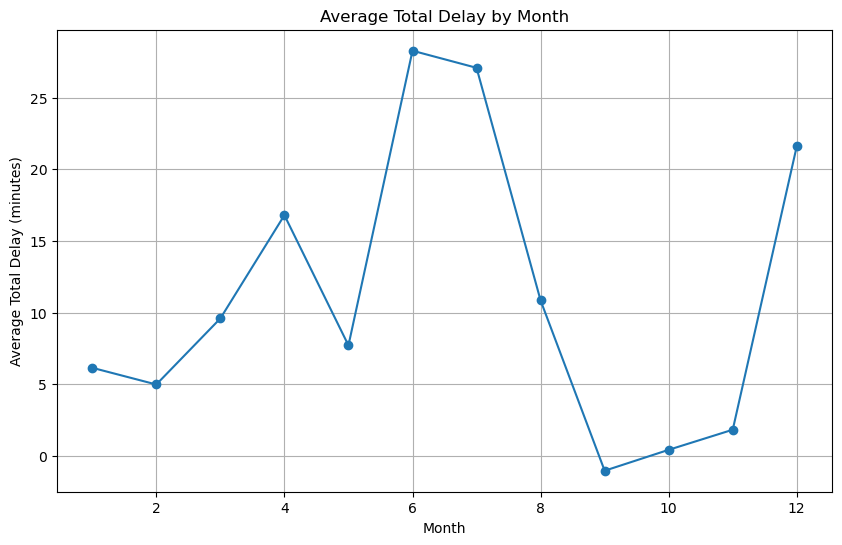

In [7]:

# Group delays by month
monthly_delays = data.groupby('month')['total_delay'].mean()

# Visualize average delays by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_delays.index, monthly_delays.values, marker='o')
plt.title('Average Total Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Delay (minutes)')
plt.grid()
plt.show()


### Daily Delay Patterns

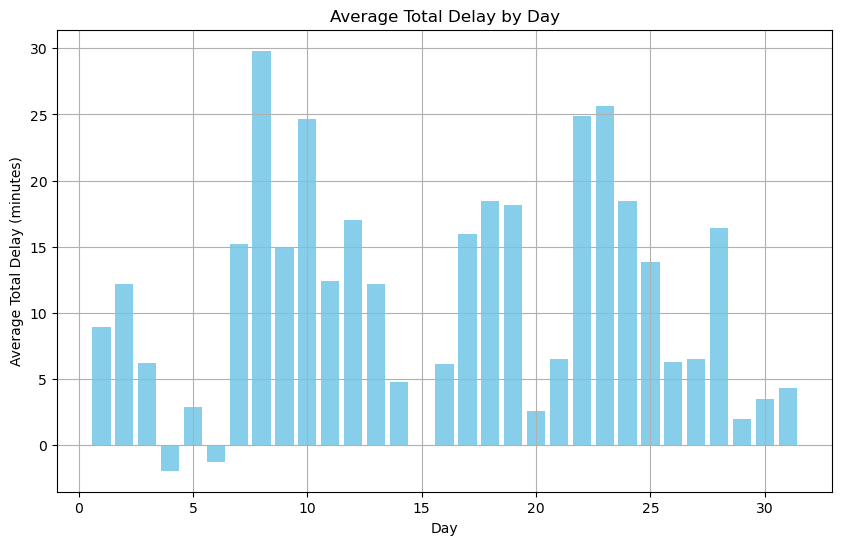

In [10]:

# Group delays by day
daily_delays = data.groupby('day')['total_delay'].mean()

# Visualize average delays by day
plt.figure(figsize=(10, 6))
plt.bar(daily_delays.index, daily_delays.values, color='skyblue')
plt.title('Average Total Delay by Day')
plt.xlabel('Day')
plt.ylabel('Average Total Delay (minutes)')
plt.grid()
plt.show()


## Which Airline Has the Most Delays
---

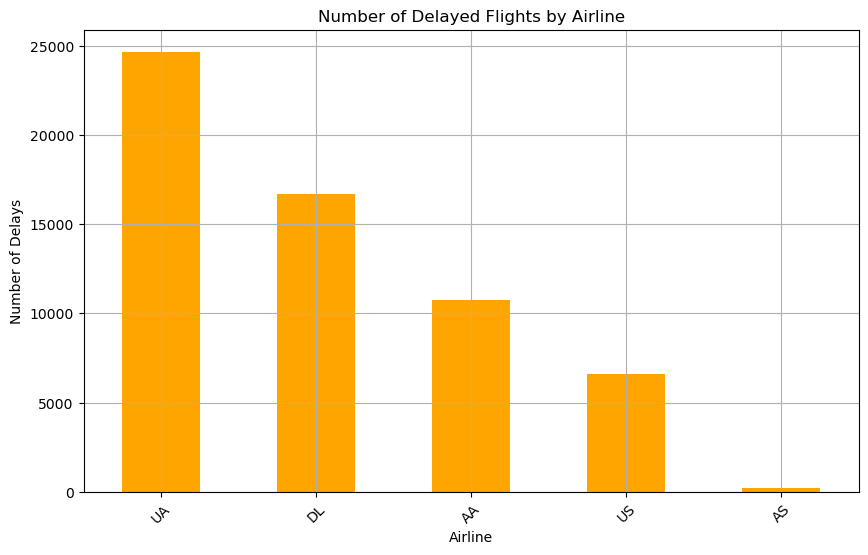

Airline with most delays: UA


In [13]:

# Total delayed flights by carrier
carrier_delays = data[data['is_delayed']].groupby('carrier').size().sort_values(ascending=False)

# Visualize airline delays
plt.figure(figsize=(10, 6))
carrier_delays.plot(kind='bar', color='orange')
plt.title('Number of Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.grid()
plt.show()

print(f"Airline with most delays: {carrier_delays.idxmax()}")


## Which Airline Has the Most Flights Arriving on Time
---

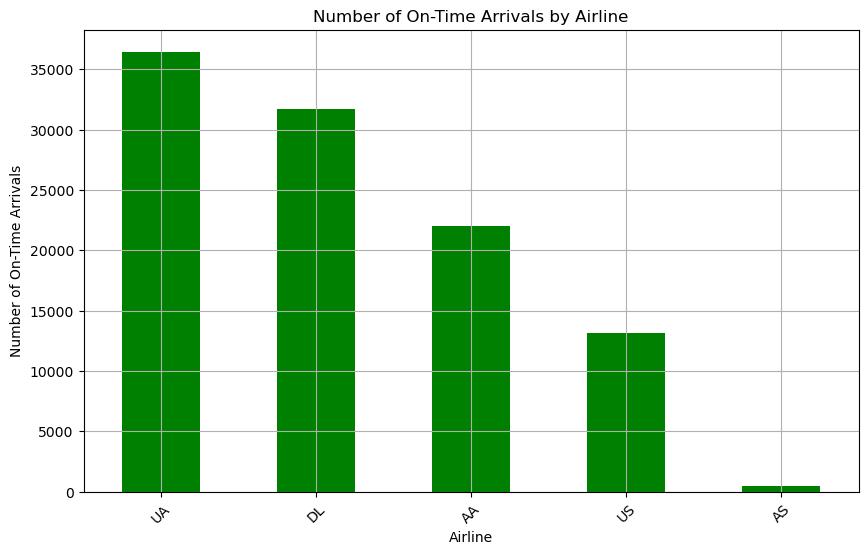

Airline with most on-time arrivals: UA


In [16]:

# Flights with on-time arrival
on_time_arrivals = data[data['arr_delay'] <= 0].groupby('carrier').size().sort_values(ascending=False)

# Visualize airline on-time arrivals
plt.figure(figsize=(10, 6))
on_time_arrivals.plot(kind='bar', color='green')
plt.title('Number of On-Time Arrivals by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of On-Time Arrivals')
plt.xticks(rotation=45)
plt.grid()
plt.show()

print(f"Airline with most on-time arrivals: {on_time_arrivals.idxmax()}")


## Which Airline Has the Most Flights Departing on Time
---

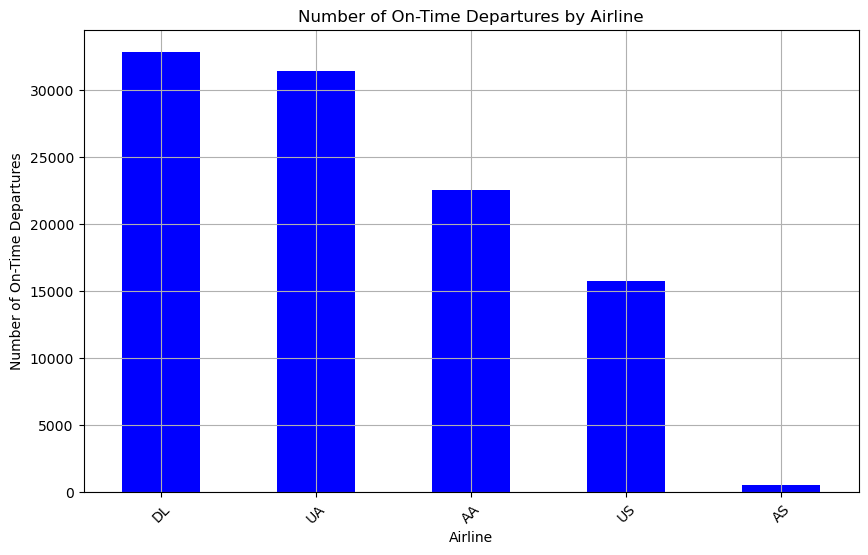

Airline with most on-time departures: DL


In [19]:

# Flights with on-time departure
on_time_departures = data[data['dep_delay'] <= 0].groupby('carrier').size().sort_values(ascending=False)

# Visualize airline on-time departures
plt.figure(figsize=(10, 6))
on_time_departures.plot(kind='bar', color='blue')
plt.title('Number of On-Time Departures by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of On-Time Departures')
plt.xticks(rotation=45)
plt.grid()
plt.show()

print(f"Airline with most on-time departures: {on_time_departures.idxmax()}")
